<a href="https://colab.research.google.com/github/MostafaJahanian/Free_Projects/blob/main/rice_image_classification_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download muratkokludataset/rice-image-dataset

 92% 201M/219M [00:05<00:00, 33.4MB/s]
100% 219M/219M [00:05<00:00, 41.2MB/s]


In [ ]:
! unzip rice-image-dataset.zip

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import pathlib
import PIL

In [11]:
tf.random.set_seed(42)

train_images = keras.utils.image_dataset_from_directory('/content/Rice_Image_Dataset',
                                                        validation_split = 0.2,
                                                        subset = 'training', 
                                                        seed = 1)

test_images = keras.utils.image_dataset_from_directory('/content/Rice_Image_Dataset',
                                                       validation_split = 0.2,
                                                       subset = 'validation',
                                                       seed = 1)

Found 75000 files belonging to 5 classes.
Using 60000 files for training.
Found 75000 files belonging to 5 classes.
Using 15000 files for validation.


In [12]:
train_images.class_names

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [22]:
data_dir = pathlib.Path('/content/Rice_Image_Dataset')

for label in train_images.class_names:
  images = list(data_dir.glob(f'{label}/*'))
  print(len(images))

15000
15000
15000
15000
15000


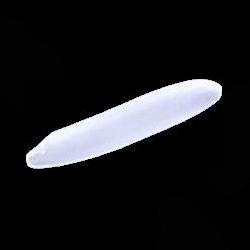

In [23]:
basmati = list(data_dir.glob('Basmati/*'))
PIL.Image.open(str(random.choice(basmati)))